In [1]:
from parser import get_files_in_folder, parse_gene_sequences
from damerau_levenshtein import damerau_levenshtein
from gen_algo import crossover, mutate

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os, sys

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.cluster import KMeans, HDBSCAN, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from keras.utils import to_categorical

In [4]:
dataset = pd.read_csv('dataset copy.csv', sep=';')

x = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [31]:
pca = PCA(n_components=0.95, random_state=42)
x_pca = pca.fit_transform(x)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_pca)

In [34]:
# implementing silhoutte score
params = [2, 3, 4, 5, 6, 7, 8, 9, 10]
paramGrid = ParameterGrid({'n_clusters': params})

best_score = -1

silhouette_scores = []

kmeans = KMeans()

for p in paramGrid:
	kmeans.set_params(**p)
	kmeans.fit(x_pca)

	silScore = silhouette_score(x_pca, kmeans.labels_, random_state=0)
	silhouette_scores.append(silScore)

	print('Parameter: ', p, 'Score: ', silScore)

	if silScore > best_score:
		best_score = silScore
		best_grid = p

Parameter:  {'n_clusters': 2} Score:  0.9492766735491328
Parameter:  {'n_clusters': 3} Score:  0.7799229205866604
Parameter:  {'n_clusters': 4} Score:  0.9300099038190928
Parameter:  {'n_clusters': 5} Score:  0.9301758205415009
Parameter:  {'n_clusters': 6} Score:  0.9349737524863556
Parameter:  {'n_clusters': 7} Score:  0.9526885350287364
Parameter:  {'n_clusters': 8} Score:  0.952688588016981
Parameter:  {'n_clusters': 9} Score:  0.954487111555541
Parameter:  {'n_clusters': 10} Score:  0.9574155799278163


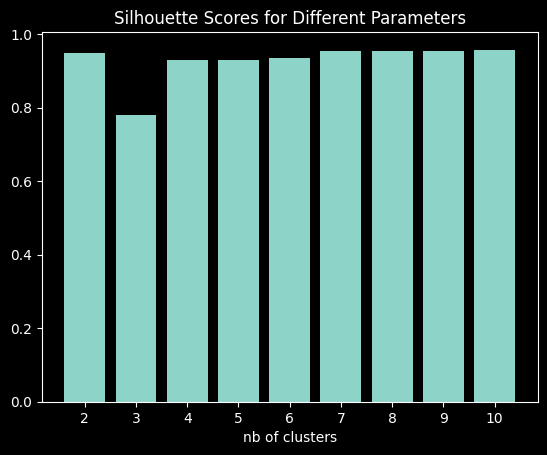

In [35]:
# plot the silhouette scores
plt.bar(range(len(silhouette_scores)), silhouette_scores, tick_label=list(params))
plt.xticks(range(len(silhouette_scores)), params)
plt.title('Silhouette Scores for Different Parameters')
plt.xlabel('nb of clusters')

plt.show()

Best grid:  10 Best score:  0.9574155799278163


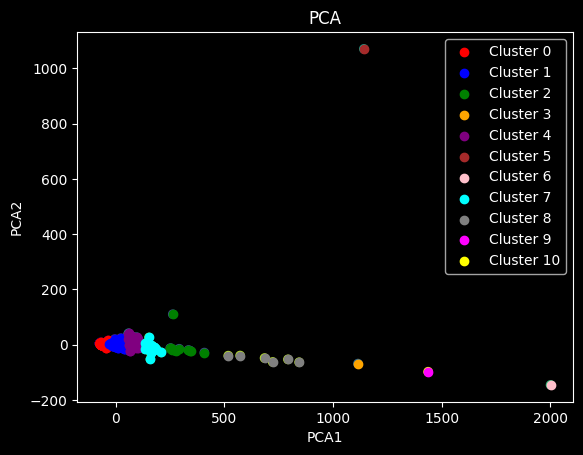

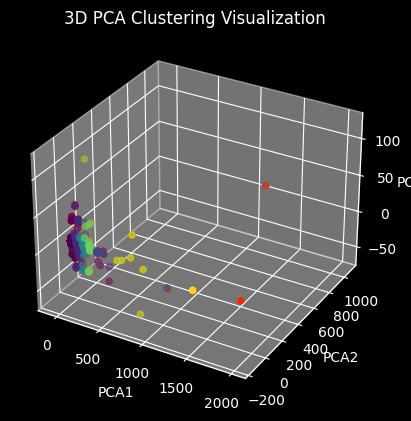

In [43]:
print('Best grid: ', best_grid['n_clusters'], 'Best score: ', best_score)

y_pred = KMeans(n_clusters=best_grid['n_clusters'], random_state=0).fit_predict(x_pca)

km = KMeans(n_clusters=best_grid['n_clusters'], random_state=0).fit(x_pca)
y_kmeans = km.predict(x_pca)

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_)

# legend
plt.scatter(x_pca[kmeans.labels_ == 0, 0], x_pca[kmeans.labels_ == 0, 1], color='red', label='Cluster 0')
plt.scatter(x_pca[kmeans.labels_ == 1, 0], x_pca[kmeans.labels_ == 1, 1], color='blue', label='Cluster 1')
plt.scatter(x_pca[kmeans.labels_ == 2, 0], x_pca[kmeans.labels_ == 2, 1], color='green', label='Cluster 2')	
plt.scatter(x_pca[kmeans.labels_ == 3, 0], x_pca[kmeans.labels_ == 3, 1], color='orange', label='Cluster 3')
plt.scatter(x_pca[kmeans.labels_ == 4, 0], x_pca[kmeans.labels_ == 4, 1], color='purple', label='Cluster 4')
plt.scatter(x_pca[kmeans.labels_ == 5, 0], x_pca[kmeans.labels_ == 5, 1], color='brown', label='Cluster 5')
plt.scatter(x_pca[kmeans.labels_ == 6, 0], x_pca[kmeans.labels_ == 6, 1], color='pink', label='Cluster 6')
plt.scatter(x_pca[kmeans.labels_ == 7, 0], x_pca[kmeans.labels_ == 7, 1], color='cyan', label='Cluster 7')
plt.scatter(x_pca[kmeans.labels_ == 8, 0], x_pca[kmeans.labels_ == 8, 1], color='gray', label='Cluster 8')
plt.scatter(x_pca[kmeans.labels_ == 9, 0], x_pca[kmeans.labels_ == 9, 1], color='magenta', label='Cluster 9')
plt.scatter(x_pca[kmeans.labels_ == 10, 0], x_pca[kmeans.labels_ == 10, 1], color='yellow', label='Cluster 10')
	
plt.legend()

plt.title('PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# 3D plot
from mpl_toolkits.mplot3d import Axes3D

# Recompute PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3, random_state=42)
x_pca_3d = pca_3d.fit_transform(x)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.view_init(azim=0)
ax.scatter(x_pca_3d[:, 0], x_pca_3d[:, 1], x_pca_3d[:, 2], c=kmeans.labels_)
# legend
for i in range(best_grid['n_clusters']):
	ax.scatter(
		x_pca_3d[kmeans.labels_ == i, 0],
		x_pca_3d[kmeans.labels_ == i, 1], 
		x_pca_3d[kmeans.labels_ == i, 2], 
		color=plt.cm.hsv(i), label=f'Cluster {i}')
# ax.legend()
ax.set_title('3D PCA Clustering Visualization')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

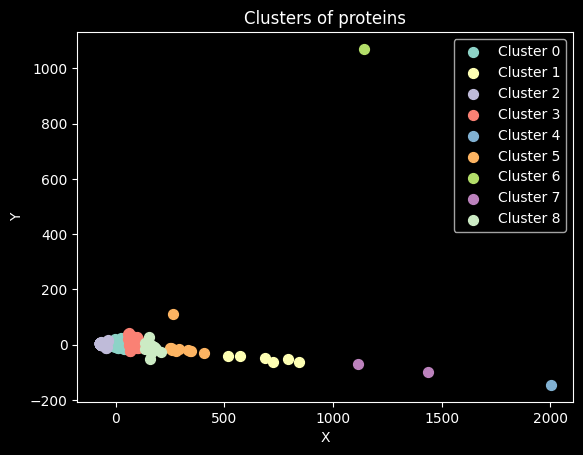

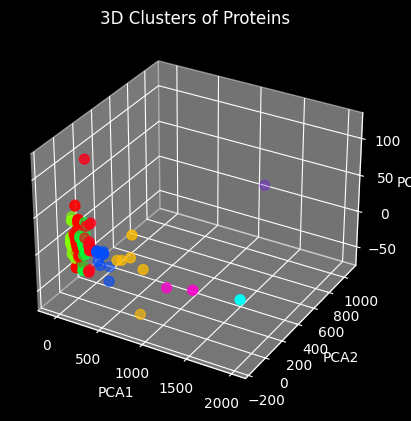

In [24]:
# ax = plt.gca()
# ax.set_xlim([-200, 450])
# ax.set_ylim([-100, 80])

for i in range(best_grid['n_clusters']):
	plt.scatter(x_pca[y_kmeans == i, 0], x_pca[y_kmeans == i, 1], s=50, label=f'Cluster {i}')

# name the axes
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters of proteins')
plt.legend()

plt.show()

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=y_kmeans, s=50, cmap='hsv')
# name the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('3D Clusters of Proteins')
plt.show()


In [11]:
hdb = HDBSCAN()
hdb.fit(x)
hdb_labels = hdb.labels_

KeyboardInterrupt: 

In [ ]:
# print max number of clusters found by HDBSCAN
print('Max number of clusters found by HDBSCAN: ', len(np.unique(hdb_labels)))

# ax = plt.gca()
# ax.set_ylim([-10, 20])
# ax.set_xlim([-10, 20])

for i in np.unique(hdb_labels):
	plt.scatter(x[hdb_labels == i, 0], x[hdb_labels == i, 1], s=50, label='Cluster ' + str(i))

# plt.legend()

plt.title('Clusters of proteins')
plt.xlabel
plt.ylabel('Y')

# plt.legend()
plt.show()

In [ ]:
# Définir un modèle autoencodeur pour le clustering
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(x.shape[1], activation='sigmoid'))

# Compiler le modèle avec une fonction de perte adaptée
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()
                                                                       
# Entraînement du modèle (Autoencodeur)
history = model.fit(x, x, epochs=100, batch_size=16, verbose=0)

# Afficher l'évolution de la fonction de perte
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

# Afficher l'évolution de la précision
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()

In [ ]:
# clustering
encoder = Sequential()
encoder.add(model.layers[0])
encoder.add(model.layers[1])
encoder.add(model.layers[2])

X_encoded = encoder.predict(x)

In [ ]:
# clustering
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred = kmeans.fit_predict(X_encoded)

# ax = plt.gca()
# ax.set_xlim([-5, 50])
# ax.set_ylim([-5, 30])

# Afficher les résultats du clustering
for i in range(2):
	plt.scatter(X_encoded[y_pred == i, 0], X_encoded[y_pred == i, 1], s=50, label='Cluster ' + str(i))

plt.title('Clusters of Proteins')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.show()

In [ ]:
dbscan_2 = DBSCAN(min_samples=5)
dbscan_labels_2 = dbscan_2.fit_predict(X_encoded)

# print max number of clusters found by DBSCAN
print('Max number of clusters found by HDBSCAN: ', len(np.unique(dbscan_labels_2)))

# ax = plt.gca()
# ax.set_xlim([-20, 50])
# ax.set_ylim([-30, 20])

for i in range(len(np.unique(dbscan_labels_2))):
	plt.scatter(X_encoded[dbscan_labels_2 == i, 0], X_encoded[dbscan_labels_2 == i, 1], s=50, label='Cluster ' + str(i))

plt.title('Clusters of Proteins')
plt.xlabel('X1')
plt.ylabel('X2')
# plt.legend()
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_encoded_3d = pca_3d.fit_transform(X_encoded)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Use y_pred from kmeans clustering on X_encoded
for i in np.unique(y_pred):
	ax.scatter(
		X_encoded_3d[y_pred == i, 0],
		X_encoded_3d[y_pred == i, 1],
		X_encoded_3d[y_pred == i, 2],
		s=40,
		label=f'Cluster {i}'
	)

ax.set_title('3D Representation of Clusters')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()